# GDP analysis for Singapore

In [40]:
import os
import pandas as pd
from src.regressions import *
from src.evaluation_metrics import *
from src.helpers import *
from src.feature_engineering import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


In [2]:
PATH = os.path.join("..", "data", "singapore.csv")
dataset = pd.read_csv(PATH)

In [3]:
dataset

,YEAR,GOVERNMENT SHARE OF RGDPL (unit %),INVESTMENT SHARE OF CGDP (unit %),INVESTMENT SHARE OF RGDPL (unit %),OPENNESS IN CONSTANT PRICES (unit %),OPENNESS IN CURRENT PRICES (unit %),POPULATION (unit 000S),PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE),PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE),PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100),PRICE LEVEL OF INVESTMENT (unit PPP/XRATE),RATIO OF GNP TO GDP (CURRENT PRICES) (unit %),REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


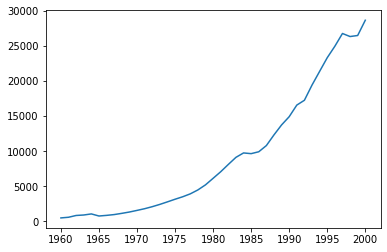

In [41]:
plt.plot(dataset["YEAR"], dataset["REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)"])

Index(['YEAR', 'GOVERNMENT SHARE OF RGDPL (unit %)',
       'INVESTMENT SHARE OF CGDP (unit %)',
       'INVESTMENT SHARE OF RGDPL (unit %)',
       'OPENNESS IN CONSTANT PRICES (unit %)',
       'OPENNESS IN CURRENT PRICES (unit %)', 'POPULATION (unit 000S)',
       'PRICE LEVEL OF CONSUMPTION (unit PPP/XRATE)',
       'PRICE LEVEL OF GOVERNMENT (unit PPP/XRATE)',
       'PRICE LEVEL OF GROSS DOMESTIC PRODUCT (unit US=100)',
       'PRICE LEVEL OF INVESTMENT (unit PPP/XRATE)',
       'RATIO OF GNP TO GDP (CURRENT PRICES) (unit %)',
       'REAL GROSS DOMESTIC PRODUCT PER CAPITA (CURRENT PRICES) (unit $ CURRENT)'],
      dtype='object')
(37, 11)


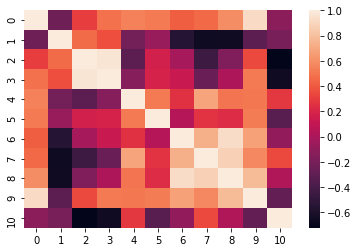

In [60]:
X, y = X_y_from_dataset(dataset)
print(dataset.columns)
print(X.shape)
X = build_poly(X, 2)[:, 1:]
correlation_matrix = np.corrcoef(X, rowvar=False)
import seaborn as sns 
sns.heatmap(correlation_matrix)
dataset.iloc[:,:-1].columns[np.sum(correlation_matrix > 0.98, axis=1) > 1]
#X = z_score_scaling(X)


In [61]:
X_train, X_test, y_train, y_test = split(X, y)
w = least_squares(X_train, y_train)
w

array([[  -27.25745394],
       [-1247.24993492],
       [ -358.06756271],
       [  407.08067296],
       [   17.28470396],
       [   -1.34440539],
       [ -219.50064113],
       [  -60.17124486],
       [    1.38741257],
       [  415.82072794],
       [  688.44840435]])

In [62]:
r_2 = R_squared(y_test, predict(X_test,w))
r_2

-0.1292167770999082